# Projeto SuperComputação 2023.2

## Análise de Redes Sociais: encontrando a clique máxima em um grafo.

![Exemplo Clique](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png)


A análise de redes sociais (ARS) é uma abordagem oriunda de áreas tais como Sociologia, Psicologia Social e Antropologia. Tal abordagem estuda as ligações relacionais (*relational tie*) entre atores sociais. Os atores na ARS podem ser tanto pessoas e empresas, analisadas como unidades individuais, quanto unidades sociais coletivas como, por exemplo, departamentos dentro de uma organização, agências de serviço público em uma cidade, estados-nações de um continente, dentre outras. A ARS difere fundamentalmente de outros estudos pelo fato de que sua ênfase não é nos atributos (características) dos atores, mas nas ligações entre eles.


A idéia de uma clique em um grafo é relativamente simples. No nível mais geral, uma clique é um subconjunto de uma rede no qual os atores são mais próximos entre si do que com outros membros da rede. Em termo de laços de amizade, por exemplo, não é incomum encontrar grupos humanos que formam cliques baseando-se em idade, gênero, raça, etnia, religião, ideologia, e muitas coisas coisas. Uma clique é, portanto, um conjunto de vértices em um grafo em que cada par de vértices está diretamente conectado por uma aresta.

Encontrar a clique máxima em um grafo é uma tarefa computacionalmente desafiadora devido à natureza combinatória do problema.  A dificuldade computacional surge da necessidade de explorar todas as combinações possíveis de vértices para identificar a maior clique, o que se torna exponencial em relação ao número de vértices. Isso resulta em uma complexidade computacional alta, mesmo para grafos moderadamente grandes.

A importância de estudar cliques está notavelmente presente na análise de redes sociais, onde as cliques representam grupos coesos de indivíduos que compartilham interesses, amizades ou conexões em comum. A identificação de cliques ajuda a entender a estrutura de uma rede social, identificar influenciadores e grupos de afinidade, além de auxiliar na detecção de comunidades e na análise de dinâmicas sociais.

As cliques são importantes, pois além de desenvolver em seus membros comportamentos homogêneos, elas têm, por definição, grande proximidade, aumentando a velocidade das trocas. Assim, informações dirigidas a uma clique são rapidamente absorvidas pelos seus membros, que tendem a percebê-las de forma semelhante. Isso é importante, por exemplo, em estratégias de segmentação.


Portanto, a resolução eficiente do problema da clique máxima tem aplicações valiosas em áreas que vão desde a ciência da computação até a análise de dados em redes sociais.

## SUA TAREFA: Encontrar a clique máxima em um grafo.

Seu programa deve receber um grafo a partir de um input de texto (abaixo você vai encontrar o código gerador do input). A partir da leitura do arquivo, você deve armazenar o grafo computacionalmente (matriz de adjacência, por exemplo). E com isso, você deverá executar três implementações:

1. **Abordagem Exaustiva**

A exaustão é uma abordagem que seleciona iterativamente os vértices para formar um clique, geralmente começando com um vértice e adicionando outros que tenham o maior número de vizinhos já na clique. Aqui está um pseudo-código simplificado para detectar cliques em um grafo usando essa abordagem. ATENÇÃO: esse pseudo-codigo **não** é a solução completa dessa abordagem. Você pode se inspirar nele para compreender como resolver o problema, mas é parte de sua tarefa desenvolver a solução.

```
Função EncontrarCliqueMaxima(grafo, numVertices)
    cliqueMaxima = ListaVazia()
    candidatos = ListaDeNós()  # Inicialmente, todos os nós são candidatos

    Para cada i de 0 até numVertices - 1 Faça
        Adicione i à lista de candidatos

    Enquanto candidatos não estiver vazia Faça
        v = Último elemento de candidatos
        Remova o último elemento de candidatos

        podeAdicionar = Verdadeiro

        Para cada u em cliqueMaxima Faça
            Se grafo[u][v] == 0 Então
                podeAdicionar = Falso
                Pare o loop
            Fim Se
        Fim Para

        Se podeAdicionar for Verdadeiro Então
            Adicione v a cliqueMaxima
            novosCandidatos = ListaDeNós()

            Para cada u em candidatos Faça
                adjacenteATodos = Verdadeiro

                Para cada c em cliqueMaxima Faça
                    Se grafo[u][c] == 0 Então
                        adjacenteATodos = Falso
                        Pare o loop
                    Fim Se
                Fim Para

                Se adjacenteATodos for Verdadeiro Então
                    Adicione u a novosCandidatos
                Fim Se
            Fim Para

            candidatos = novosCandidatos
        Fim Se
    Fim Enquanto

    Retorne cliqueMaxima
Fim Função


```

Implemente o código em C++.

Aproveite para pensar se é possível adotar alguma heurística. Por exemplo, ordenar os nós em função do grau de adjacência, ajuda?


**Sua segunda tarefa**: Até qual tamanho de problema você conseguiu obter um resultado em tempo hábil (aprox. 15 min)? Você deve apresentar um pseudo-codigo de uma heurística para otimizar essa tarefa exaustiva. É possível implementar alguma poda? Algum critério que evite calcular um nó, dado que você já descobriu uma clique maior?



Grafo densamente conectado gerado e salvo em 'grafo.txt'.


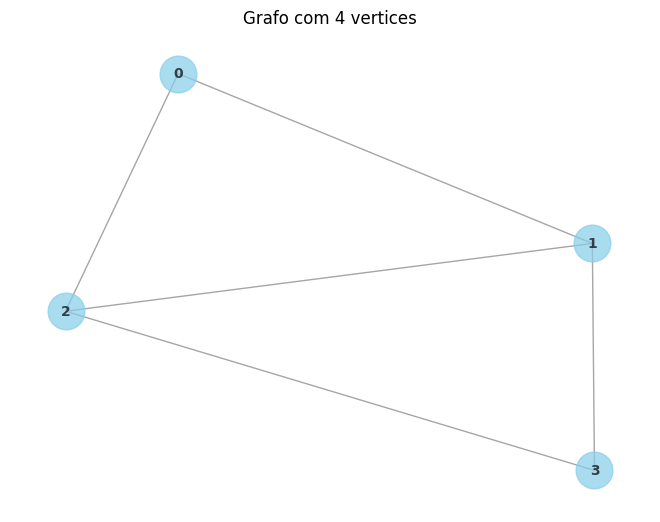

<Figure size 640x480 with 0 Axes>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def write_graph(nome_arquivo, num_vertices):
  # Parâmetros
  probabilidade_conexao = 0.7  # Probabilidade de haver uma aresta entre dois vértices (ajuste conforme necessário)

  # Crie um grafo aleatório densamente conectado
  grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

  # Abra o arquivo para escrita
  with open(nome_arquivo, 'w') as arquivo:
      # Escreva a quantidade de vértices e número de arestas na primeira linha
      arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

      # Escreva as arestas no formato de lista de adjacência
      for aresta in grafo.edges():
          arquivo.write(f"{aresta[0]+1} {aresta[1]+1}\n")  # +1 para ajustar os índices (começando em 1)

  print(f"Grafo densamente conectado gerado e salvo em '{nome_arquivo}'.")

  # Desenha Grafo
  pos = nx.spring_layout(grafo)
  nx.draw(grafo, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue',
          font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)

  plt.title("Grafo com " + str(num_vertices) + " vertices")
  plt.savefig(nome_arquivo + str(num_vertices) +  '.png')
  plt.show()

num_vertices = 4
write_graph("grafo.txt", num_vertices)

```
Busca Exaustiva Local
```

In [ ]:
%%writefile busca_exaustiva_local.cpp

#include<iostream>
#include<vector>
#include <fstream>
#include<algorithm>

using namespace std;

// ---------------------------------------------------------------------------
// ----------------------------- LER GRAFO -----------------------------------
// ---------------------------------------------------------------------------

vector<vector<int>> LerGrafo(string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();
    return grafo;
}


// ---------------------------------------------------------------------------
// -------------------------- CLIQUE MÁXIMA ----------------------------------
// ---------------------------------------------------------------------------

vector<int> EncontrarCliqueMaxima(vector<vector<int>> grafo, int numVertices) {
    vector<int> cliqueMaxima;
    vector<int> candidatos;

    // No inicio todos os nós são candidatos
    for (int i = 0; i < numVertices; ++i) {
        candidatos.push_back(i);
    }

    // Enquanto lista de candidados não vazia
    while(!candidatos.empty()){
        int v = candidatos.back();
        candidatos.pop_back();


        bool podeAdicionar = true;
        for (int u : cliqueMaxima) {
            if (grafo[u][v] == 0) {
                podeAdicionar = false;
                break;
            }
        }

        if (podeAdicionar) {
            cliqueMaxima.push_back(v);
            vector<int> novosCandidatos;

            for (int u : candidatos) {
                bool adjacenteATodos = true;

                for (int c : cliqueMaxima) {
                    if (grafo[u][c] == 0) {
                        adjacenteATodos = false;
                        break;
                    }
                }

                if (adjacenteATodos) {
                    novosCandidatos.push_back(u);
                }
            }

            candidatos = novosCandidatos;
        }
   }

   return cliqueMaxima;
}


// ---------------------------------------------------------------------------
// ------------------------------- MAIN --------------------------------------
// ---------------------------------------------------------------------------

int main() {

    string nomeArquivo = "grafo.txt";
    int numVertices = 4;

    vector<vector<int>> grafo = LerGrafo(nomeArquivo, numVertices);
    vector<int> cliqueMaxima =  EncontrarCliqueMaxima(grafo,numVertices);

    // Printa CliqueMaximo Encontrado
    cout << " ===== [Busca Exaustiva Local] ===== \n";
    cout << "\n > Clique Máxima encontrada : [";
    for (auto &el : cliqueMaxima) {
      cout << el+1 << " ";
    }
    cout << "] \n";

    cout << "\n > Tamanho : " << cliqueMaxima.size();

    return 0;
}



Overwriting busca_exaustiva_simples.cpp


In [ ]:
!g++ -O3 -Wall busca_exaustiva_simples.cpp -o busca_exaustiva_simples

In [ ]:
!./busca_exaustiva_simples

 ===== [Busca Exaustiva Local] ===== 

 > Clique Máxima encontrada : [4 3 2 ] 

 > Tamanho : 3

In [ ]:
import networkx as nx

def cliqueMaximo_Resposta(nome_arquivo):
  # Abrir o arquivo e pular a primeira linha
  with open(nome_arquivo, 'r') as arquivo:
      next(arquivo)  # Pula a primeira linha

      # Lê o grafo a partir das linhas restantes
      G = nx.parse_adjlist(arquivo)

  # Encontrar todas as cliques maximais
  cliques_maximais = list(nx.find_cliques(G))

  # Encontrar a clique máxima (a maior)
  clique_maxima = max(cliques_maximais, key=len)

  print(" ===== [ RESPOSTAS ] ===== ")
  print("\n > Cliques maximais encontradas:")
  for clique in cliques_maximais:
      print(clique)

  print("\n > Clique máxima encontrada:", clique_maxima)
  print("\n > Clique máxima tamanho:", len(clique_maxima))

cliqueMaximo_Resposta("grafo.txt")

 ===== [ RESPOSTAS ] ===== 

 > Cliques maximais encontradas:
['4', '3', '2']
['4', '1']

 > Clique máxima encontrada: ['4', '3', '2']

 > Clique máxima tamanho: 3




```
Busca Exaustiva Global
```



```
Busca Exaustiva com Heuristica - Grau dos Vértices
```

Podemos definir o grau de adjacencia de um grafo simples como:

> O grau de um vértice , com o grafo representado em uma matriz de adjacencia, é dado pela soma dos elementos de sua linha (ou coluna) correspondente. [1]

ou, similarmente, também pode ser definido como:

> O grau de um vértice v em um grafo G também pode
ser visto como a quantidade de arestas incidentes em
v. [2]

Para facilitar o entendimento desse conceito, observe o grafo abaixo apresentado:

<img alt="Exemplo de calculo de grau do nó" src="img/utils/calcula_grau_exemplo.png" />

Temos que o grau dos vertices é dado pela quantidade de arestas ligadas a ele (no caso de um grafo não direcional, não faz diferença se essas arestas são de entrada ou de saída):

$$d(v1) = 2$$

$$d(v2) = 1$$

$$d(v3) = 3$$

$$d(v4) = 2$$

$$d(v5) = 0$$


É possível inferir que a estratégia de ordenar os vertices de acordo com o seu grau de adjacencia seja uma estratégia eficaz para melhorar o desempenho do algorítimo. Isso se deve ao fato de que os vértices com maiores graus de adjacência tendem a ter uma maior probabilidade de pertencer a clique máxima, visto que em um clique, todos os vértices estão concetados entre si.


[1] https://www.ibilce.unesp.br/Home/Departamentos/MatematicaAplicada/socorro4029/representa_grafos2.pdf

[2] https://www.facom.ufms.br/~fhvm/disciplinas/anteriores/2005/grafos/aula2.pdf




2. **Implementação com Threads OpenMP**

A implementação de uma solução com OpenMP para encontrar cliques em um grafo usando a heurística gulosa envolve a paralelização das iterações do algoritmo em diferentes threads. O OpenMP simplifica a criação de threads e a coordenação entre elas.


Nessa implementação você deve apresentar o código-fonte modificado, justificar a alteração feita, e mostrar também o speed up obtido. Faça uso de gráficos e tabelas para mostrar que sua implementação em openMP valeu a pena. Observe que mesmo assim você não vai conseguir resolver exaustivamente o problema, mas o tamanho do grafo será maior, e o tempo de processamento para um mesmo tamanho deve ser preferencialmente menor.


3. **Paralelização e Distribuição do Processamento com MPI**

Nesta implementação, você deve dividir o problema em várias partes e distribuí-las para diferentes processadores usando a biblioteca MPI (*Message Passing Interface*). Cada processador será responsável por encontrar cliques em uma parte do grafo, e os resultados serão combinados no final para encontrar todas as cliques no grafo.



## Como apresentar seus resultados


Você deverá focar em comparar suas implementações em relação ao speedup. Aumente o tamanho do grafo e das arestas, e busque determinar a clique máxima.

## Códigos-fonte de apoio


1. Código-fonte de geração do grafo (em Python)


```python

import networkx as nx
import random

# Parâmetros
num_vertices = 1000  # Número de vértices no grafo
probabilidade_conexao = 0.7  # Probabilidade de haver uma aresta entre dois vértices (ajuste conforme necessário)

# Crie um grafo aleatório densamente conectado
grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

# Nome do arquivo de saída
nome_arquivo = "grafo.txt"

# Abra o arquivo para escrita
with open(nome_arquivo, 'w') as arquivo:
    # Escreva a quantidade de vértices e número de arestas na primeira linha
    arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

    # Escreva as arestas no formato de lista de adjacência
    for aresta in grafo.edges():
        arquivo.write(f"{aresta[0]+1} {aresta[1]+1}\n")  # +1 para ajustar os índices (começando em 1)

print(f"Grafo densamente conectado gerado e salvo em '{nome_arquivo}'.")

```


2. Trecho de código-fonte para leitura do grafo e armazenamento como matriz de adjacência

```cpp
// Função para ler o grafo a partir do arquivo de entrada
std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}
```

3. Verificar (em Python) se seu programa encontrou a clique correta. Para isso, use a implementação abaixo, ela já está adaptada para ler nosso arquivo de input, ignorando a primeira linha.


```python
import networkx as nx

# Nome do arquivo de entrada
nome_arquivo = "seu_arquivo.txt"

# Abrir o arquivo e pular a primeira linha
with open(nome_arquivo, 'r') as arquivo:
    next(arquivo)  # Pula a primeira linha

    # Lê o grafo a partir das linhas restantes
    G = nx.parse_adjlist(arquivo)

# Encontrar todas as cliques maximais
cliques_maximais = list(nx.find_cliques(G))

# Encontrar a clique máxima (a maior)
clique_maxima = max(cliques_maximais, key=len)

print("Cliques maximais encontradas:")
for clique in cliques_maximais:
    print(clique)

print("Clique máxima encontrada:", clique_maxima)


```


## Critérios de avaliação

A correção do projeto levará em conta:

+ [Até 2 pontos] **Organização geral**
  - Organização do código fonte e/ou do notebook que centraliza seus códigos. Se a entrega for via jupyter notebook, ele deve conter células markdown que guiem a apreciação do trabalho. Caso seu código esteja organizado em arquivos ".cpp", ".py", etc, submeta também um relatório em PDF descrevendo seu trabalho;

+ [Até 5 pontos] **Implementações**
  - Sua entrega deve conter ao menos 3 implementações (uma para cada solução: exaustiva, OpenMP e MPI). Soluções extras nestas vertentes são encorajadas e serão valorizadas;
  - A parte de MPI deve ser obrigatoriamente executada no cluster montado em sala de aula. Portanto, submeta também os arquivos de configuração dos executáveis em batch;
  - Esperamos códigos seguindo as boas práticas de implementação e devidamente comentados;

+ [Até 3 pontos] **Avaliação de resultados**
  - Comparações das abordagens com tamanhos diferentes de grafos;
  - Clareza na comunicação dos resultados. Ex: gráficos e/ou pequenos textos que descrevem os resultados obtidos;
  - Justificativas: é esperado que a execução paralela seja mais rápida que a sequencial, assim como uma heurística seja mais rápida que a abordagem exaustiva. Caso seus resultados diferem do esperado, argumente potenciais causas;

+ [Até 1 ponto] **Extras**
  - A rubrica não cita implementação em GPU. Caso você opte por fazer, daremos até 1 ponto extra na nota do trabalho pelo esforço;


